## Assignment 1
### Abhijith Ravikumar Puthussery

##### Computing regression parameters using

##### 1) Closed Form (Using linear algebra) 2) Gradient Descent

##### Consider the following 5 point synthetic data set:

##### X: 0,1,2,3,4 
##### Y: 1,3,7,13,21

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#### Defining the Data

In [2]:
data = {'X' : [0,1,2,3,4],'Y' : [1,3,7,13,21]}
data_frame = pd.DataFrame(data)
print(data_frame)

   X   Y
0  0   1
1  1   3
2  2   7
3  3  13
4  4  21

[5 rows x 2 columns]


In [3]:
x1 = data_frame.X[:, np.newaxis]
y1 = data_frame.Y[:, np.newaxis]

#### Closed Form Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Printing the variables

In [5]:
print('Coefficients =', lr.coef_)
print('Residual sum of squares = %0.2f' % np.mean((lr.predict(x1)-y1) ** 2))
print('Variance = %0.2f' % lr.score(x1,y1))

Coefficients = [[ 5.]]
Residual sum of squares = 2.80
Variance = 0.95


#### Closed form regression line

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


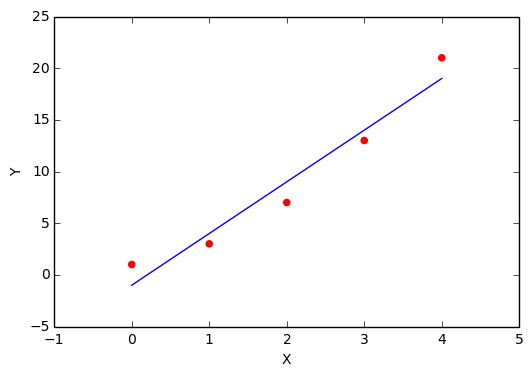

In [6]:
plt.scatter(x1,y1,color='red')
plt.plot(x1,lr.predict(x1),color='blue')
plt.xlabel('X')
plt.ylabel('Y')

### Gradient Descent Function

In [7]:

def gradient(x1, y1, theta, itr, alpha):
    theta_i = []
    cost_i = []
    k = float(x1.shape[0])
    for i in range(1,itr):
        theta = theta - (alpha/k)*x1.T*(x1*theta-y1)
        theta_i.append(theta)
        cost_i.append(costfunc(x1,y1,theta))
        return (theta, theta_i, cost_i)

#Cost Function
def costfunc(x1, y1, theta):
    k = float(x1.shape[0])
    cost = (1./(2*k))*(x1*theta-y1).T*(x1*theta-y1)
    return cost.flat[0]

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


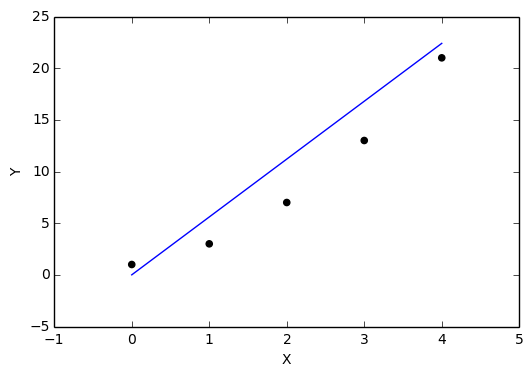

In [8]:
theta = np.matrix([[0]]) #Theta
alpha = 0.2 #Learning Rate
itr = 100 #Number of Iterations

theta, theta_i, cost_i = gradient(x1, y1, theta, itr, alpha)
result = x1*theta
plt.plot(x1, result)
plt.scatter(x1, y1, color='black')
plt.xlabel('X')
plt.ylabel('Y')
